In [22]:
import numpy as np
import matplotlib.pyplot as plt
from ConfigurationSpace import create_grid
from Astar import a_star 
from skimage.morphology import medial_axis
from skimage.util import invert
import time 
plt.rcParams['figure.figsize'] = 7, 7

In [4]:
def find_start_goal(skeleton,start,goal):
    """
    The start and goal previously defined will 
    not necessarily be on the skeleton so you
    must first identify the nearest cell on 
    the skeleton to start and goal.
    """
    cells = np.nonzero(skeleton)
    cells = np.transpose(cells)
    min_start = np.linalg.norm(np.array(start)-np.array(cells),axis=1).argmin()
    min_goal = np.linalg.norm(np.array(goal)-np.array(cells),axis=1).argmin()
    return cells[min_start],cells[min_goal]

def heuristic(current,goal):
    cost = (abs(current[0] - goal[0]) + abs(current[1] - goal[1]))
    return cost

In [5]:
# Fixed Parameters 
ALTITUDE = 3
SAFE_DISTANCE = 3
start_ne = (25,  100)
goal_ne = (650, 500)

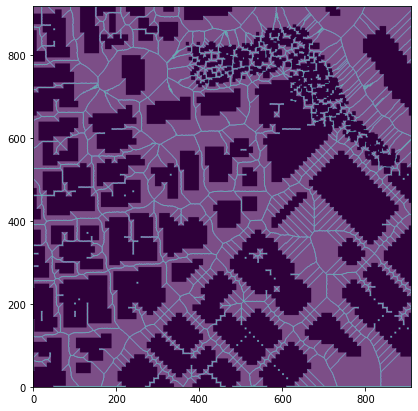

In [23]:
# This is the same obstacle data from the previous lesson.
filename = 'colliders.csv'
data = np.loadtxt(filename, delimiter=',', dtype='Float64', skiprows=2)
grid = create_grid(data, ALTITUDE, SAFE_DISTANCE)
skeleton = medial_axis(invert(grid))
# Plot the image and the skeleton
plt.imshow(grid, origin='lower',cmap="Greys")
plt.imshow(skeleton, origin='lower', alpha=0.7)

In [25]:
# Compare Regular A* to A* on skeleton
start,goal = find_start_goal(skeleton,start_ne,goal_ne)
start_regular = time.perf_counter()
regular_path = a_star(grid,heuristic,start_ne,goal_ne)
time_regular = time.perf_counter() - start_regular

start_skeleton = time.perf_counter()
skeleton_path = a_star(invert(skeleton).astype(np.int),heuristic,tuple(start),tuple(goal))
time_skeleton = time.perf_counter() - start_skeleton

print(f" It took {time_regular} to execute path planning on a grid")
print(f" It took {time_skeleton} to execute path planning on a skeleton")

Path found
Path found
 It took 0.2431000370000902 to execute path planning on a grid
 It took 0.1027577749999864 to execute path planning on a skeleton


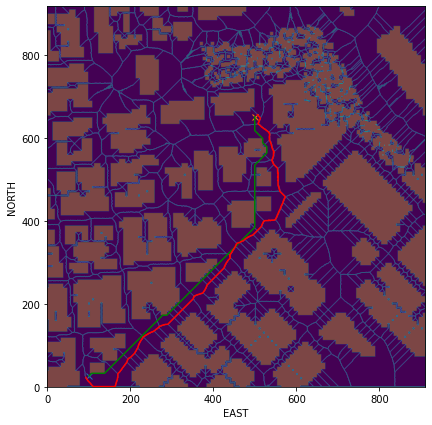

In [20]:
# Plot the image and the skeleton
plt.imshow(grid, origin='lower')
plt.imshow(skeleton, origin='lower', alpha=0.7)

# Plot the results 
plt.plot(start_ne[1], start_ne[0], 'x')
plt.plot(goal_ne[1], goal_ne[0], 'x')

pp = np.array(regular_path)
plt.plot(pp[:, 1], pp[:, 0], 'g')
pp2 = np.array(skeleton_path)
plt.plot(pp2[:, 1], pp2[:, 0], 'r')

plt.xlabel('EAST')
plt.ylabel('NORTH')
plt.show()